This project is created using data dummy of malaria clinical features

#### Directory

In [52]:
import os
cwd = os.getcwd()

#### Install packages

In [53]:
import pandas as pd        #read,explore & clean data
import numpy as np         # data manipulation
import matplotlib.pyplot as plt   # data visualization
import seaborn as sns             # data visualization

#### Read data and check

In [54]:
#set path to the data file.
data_file='C:/Users/LENOVO/Documents/GitHub/Detecting-Malaria-using-Machine-Learning/data2.csv'

In [55]:
#read the data with pandas
df=pd.read_csv(data_file)

In [56]:
# list the column names
df.columns

Index(['SampleID', 'consent_given', 'location', 'Enrollment_Year', 'bednet',
       'fever_symptom', 'temperature', 'Suspected_Organism',
       'Suspected_infection', 'RDT', 'Blood_culture', 'Urine_culture',
       'Taq_man_PCR', 'parasite_density', 'Microscopy', 'Laboratory_Results',
       'Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [57]:
# From the above list I would select blood cell features but first show the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207 entries, 0 to 2206
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SampleID                2207 non-null   object 
 1   consent_given           2207 non-null   object 
 2   location                2207 non-null   object 
 3   Enrollment_Year         2207 non-null   int64  
 4   bednet                  1676 non-null   object 
 5   fever_symptom           2200 non-null   object 
 6   temperature             2197 non-null   float64
 7   Suspected_Organism      2207 non-null   object 
 8   Suspected_infection     1569 non-null   object 
 9   RDT                     2065 non-null   object 
 10  Blood_culture           122 non-null    object 
 11  Urine_culture           112 non-null    object 
 12  Taq_man_PCR             176 non-null    object 
 13  parasite_density        2173 non-null   float64
 14  Microscopy              2170 non-null   

In [58]:
# Choose Clincal Diagnosis as the outcome, check the data
df['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

### 1. Selecting Predicting Target

In [59]:
features=df.iloc[:,16:]
features.info

<bound method DataFrame.info of          Clinical_Diagnosis  wbc_count  rbc_count  hb_level  hematocrit  \
0            Severe Malaria        5.7       2.80       5.8        16.1   
1            Severe Malaria        7.8       3.50       9.2        24.2   
2            Severe Malaria        8.2       1.00       2.3         5.7   
3            Severe Malaria       15.9       3.30      10.1        25.1   
4            Severe Malaria        4.5       2.10       5.7        16.1   
...                     ...        ...        ...       ...         ...   
2202  Uncomplicated Malaria       12.3       4.33      10.2        32.0   
2203  Non-malaria Infection        8.1       3.74       9.5        29.1   
2204  Non-malaria Infection        9.5       4.38      11.9        36.6   
2205  Non-malaria Infection       12.3       4.78      12.1        38.2   
2206  Non-malaria Infection        4.7       3.83       9.3        29.9   

      mean_cell_volume  mean_corp_hb  mean_cell_hb_conc  platelet_c

In [60]:
features.isnull().sum()

Clinical_Diagnosis         0
wbc_count                  0
rbc_count                  0
hb_level                   0
hematocrit                 0
mean_cell_volume           0
mean_corp_hb               3
mean_cell_hb_conc          2
platelet_count             9
platelet_distr_width      32
mean_platelet_vl          17
neutrophils_percent        0
lymphocytes_percent        0
mixed_cells_percent        0
neutrophils_count         12
lymphocytes_count         11
mixed_cells_count         11
RBC_dist_width_Percent     9
dtype: int64

In [64]:
features.dropna(inplace=True)

In [65]:
features.shape

(2156, 18)

In [66]:
features.columns

Index(['Clinical_Diagnosis', 'wbc_count', 'rbc_count', 'hb_level',
       'hematocrit', 'mean_cell_volume', 'mean_corp_hb', 'mean_cell_hb_conc',
       'platelet_count', 'platelet_distr_width', 'mean_platelet_vl',
       'neutrophils_percent', 'lymphocytes_percent', 'mixed_cells_percent',
       'neutrophils_count', 'lymphocytes_count', 'mixed_cells_count',
       'RBC_dist_width_Percent'],
      dtype='object')

In [67]:
features['Clinical_Diagnosis'].unique()

array(['Severe Malaria', 'Uncomplicated Malaria', 'Non-malaria Infection'],
      dtype=object)

In [68]:
labels=pd.Categorical(features['Clinical_Diagnosis'])
labels

['Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', 'Severe Malaria', ..., 'Uncomplicated Malaria', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection', 'Non-malaria Infection']
Length: 2156
Categories (3, object): ['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria']

In [69]:
features.head()

,Clinical_Diagnosis,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
0,Severe Malaria,5.7,2.8,5.8,16.1,59.0,21.1,36.0,156.0,8.2,6.8,61.8,31.7,6.5,3.6,1.8,0.3,19.0
1,Severe Malaria,7.8,3.5,9.2,24.2,70.0,26.4,37.8,55.0,16.5,7.6,68.5,23.6,7.9,5.4,1.8,0.6,14.4
2,Severe Malaria,8.2,1.0,2.3,5.7,59.0,23.8,40.4,20.0,2.3,5.9,32.8,53.3,13.9,2.8,4.3,1.1,18.0
3,Severe Malaria,15.9,3.3,10.1,25.1,75.0,30.2,40.2,132.0,17.2,6.2,82.6,11.5,5.9,13.2,1.8,0.9,13.7
4,Severe Malaria,4.5,2.1,5.7,16.1,78.0,27.1,35.4,85.0,16.1,6.8,83.7,11.3,5.0,3.8,0.5,0.2,15.0


In [70]:
#Check outcome distribution
features['Clinical_Diagnosis'].value_counts()

Non-malaria Infection    966
Uncomplicated Malaria    702
Severe Malaria           488
Name: Clinical_Diagnosis, dtype: int64

In [71]:
#Descriptive statistics
features.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
wbc_count,2156.0,10.723516,5.944994,0.5,6.80,9.30,12.900,53.90
rbc_count,2156.0,3.911679,1.132454,0.5,3.34,4.17,4.650,6.67
hb_level,2156.0,9.423010,2.650261,1.4,7.90,10.20,11.325,18.70
hematocrit,2156.0,29.320223,8.802975,4.3,24.20,31.70,35.500,52.70
mean_cell_volume,2156.0,74.828256,8.046383,7.8,70.00,75.00,80.000,121.00
mean_corp_hb,2156.0,24.142189,3.203595,2.1,22.20,24.10,26.200,38.80
mean_cell_hb_conc,2156.0,32.259318,2.864637,15.7,30.60,32.10,33.425,46.60
platelet_count,2156.0,214.545176,128.697718,3.0,105.00,201.00,300.250,1087.00
platelet_distr_width,2156.0,14.137894,3.064643,0.0,12.90,14.90,15.600,23.90
mean_platelet_vl,2156.0,8.031447,1.194886,3.3,7.20,7.90,8.800,18.60


In [72]:
features.corr()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5388\173882322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  features.corr()


,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
wbc_count,1.000000,-0.217584,-0.283881,-0.261736,-0.150900,-0.084770,0.066981,0.122330,0.022260,-0.100716,0.093870,-0.090940,-0.057664,0.876999,0.689196,0.715568,0.252208
rbc_count,-0.217584,1.000000,0.896557,0.922294,-0.017848,-0.348335,-0.497615,0.409424,0.001756,0.284809,0.077574,-0.073216,-0.056070,-0.134216,-0.233978,-0.200859,-0.364396
hb_level,-0.283881,0.896557,1.000000,0.968644,0.286931,0.023659,-0.302304,0.353828,0.068770,0.248323,0.162289,-0.158665,-0.093352,-0.153907,-0.338160,-0.273327,-0.562710
hematocrit,-0.261736,0.922294,0.968644,1.000000,0.279029,-0.101461,-0.479766,0.387830,0.091718,0.285169,0.119252,-0.113198,-0.083365,-0.152236,-0.294044,-0.253324,-0.510445
mean_cell_volume,-0.150900,-0.017848,0.286931,0.279029,1.000000,0.722231,-0.077781,-0.002473,0.268485,0.038404,0.094697,-0.079596,-0.111013,-0.080385,-0.168477,-0.199845,-0.413033
mean_corp_hb,-0.084770,-0.348335,0.023659,-0.101461,0.722231,1.000000,0.576017,-0.202177,0.094658,-0.189324,0.149581,-0.151628,-0.062552,-0.011729,-0.152329,-0.106754,-0.334053
mean_cell_hb_conc,0.066981,-0.497615,-0.302304,-0.479766,-0.077781,0.576017,1.000000,-0.310377,-0.187634,-0.329254,0.110667,-0.132823,0.043621,0.089524,-0.016254,0.090089,-0.013497
platelet_count,0.122330,0.409424,0.353828,0.387830,-0.002473,-0.202177,-0.310377,1.000000,0.070121,-0.036139,-0.056902,0.042694,0.089093,0.102714,0.078041,0.143232,-0.104004
platelet_distr_width,0.022260,0.001756,0.068770,0.091718,0.268485,0.094658,-0.187634,0.070121,1.000000,0.233941,0.001142,0.018399,-0.085652,0.015390,0.037808,-0.045928,-0.087467
mean_platelet_vl,-0.100716,0.284809,0.248323,0.285169,0.038404,-0.189324,-0.329254,-0.036139,0.233941,1.000000,-0.055283,0.052658,0.037840,-0.118462,-0.021988,-0.058788,-0.112433


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5388\2021821207.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(),cmap='coolwarm')


<AxesSubplot: >

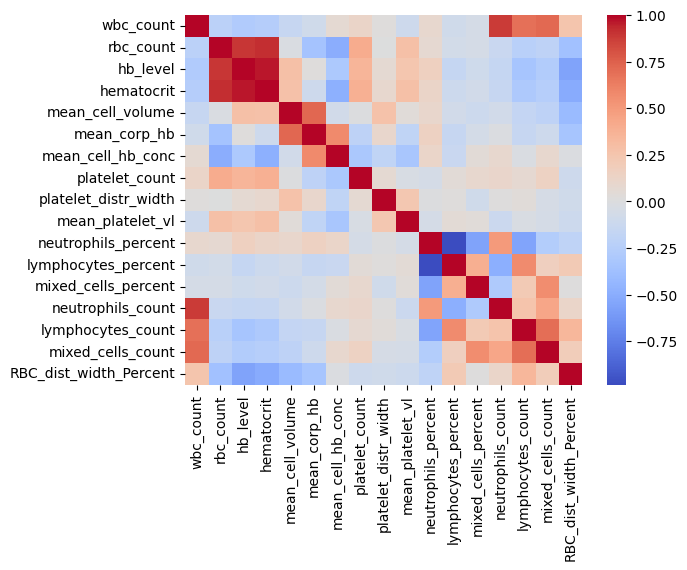

In [74]:
sns.heatmap(features.corr(),cmap='coolwarm')

### 2. Preprocessing

In [80]:
# separate the labels/classes from the features/measurement
X=features.iloc[:,1:] # X CAPITAL
y=features.iloc[:,0]

In [81]:
X.shape
y.shape

(2156,)

In [82]:
# Supervised Learning
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)

In [83]:
y_encoded[0:5]

array([1, 1, 1, 1, 1])

In [84]:
y[0:5]

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_5388\2205195451.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y[0:5]


0    Severe Malaria
1    Severe Malaria
2    Severe Malaria
3    Severe Malaria
4    Severe Malaria
Name: Clinical_Diagnosis, dtype: object

In [85]:
classes=label_encoder.classes_
classes

array(['Non-malaria Infection', 'Severe Malaria', 'Uncomplicated Malaria'],
      dtype=object)

In [105]:
string= features['Clinical_Diagnosis']=='Severe Malaria'
print(string)
print(type(string))

0        True
1        True
2        True
3        True
4        True
        ...  
2202    False
2203    False
2204    False
2205    False
2206    False
Name: Clinical_Diagnosis, Length: 2156, dtype: bool
<class 'pandas.core.series.Series'>


In [106]:
# converting string to float
string.apply(lambda x: float(x))

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2202    0.0
2203    0.0
2204    0.0
2205    0.0
2206    0.0
Name: Clinical_Diagnosis, Length: 2156, dtype: float64

### 3. Split data into train and test

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [108]:
X_train.head()

,wbc_count,rbc_count,hb_level,hematocrit,mean_cell_volume,mean_corp_hb,mean_cell_hb_conc,platelet_count,platelet_distr_width,mean_platelet_vl,neutrophils_percent,lymphocytes_percent,mixed_cells_percent,neutrophils_count,lymphocytes_count,mixed_cells_count,RBC_dist_width_Percent
1080,11.6,3.92,11.7,34.6,88.2,29.8,33.8,219.0,16.1,9.7,84.5,9.1,6.4,9.8,1.1,0.7,12.3
2100,10.4,2.69,5.5,19.2,72.0,20.3,28.4,162.0,16.0,9.4,26.7,61.3,12.0,2.9,6.3,1.2,19.8
1359,5.7,3.60,10.7,33.9,73.8,23.3,31.5,477.0,14.2,7.4,49.1,38.5,12.4,2.8,2.2,0.7,15.2
10,8.5,2.00,4.2,12.5,62.0,21.0,33.6,73.0,7.4,6.8,63.0,26.2,10.8,5.4,2.2,0.9,18.8
2134,11.2,2.84,6.5,20.6,73.0,23.0,31.8,353.0,14.8,7.7,59.1,30.8,10.1,6.7,3.4,1.1,23.3


In [ ]:
### 4. Build model

In [114]:
# Model using Decision Tree regressor

from sklearn.tree import DecisionTreeRegressor

#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
malaria_model = DecisionTreeRegressor(random_state=1)

In [115]:
# or using Random Forest

from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

#### To be continued... string of Clinical Diagnosis cannot be converted